## Setup

In [ ]:
# Imports
import pandas as pd
import urllib.request 
import urllib.request 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [ ]:
# Setting up download addresses and directories for storing
yr_range  = range(2018,2022)
base_url = "https://mrv.emsa.europa.eu/api/public-emission-report/reporting-period-document/binary/"
pwd_list = !pwd
pwd = pwd_list[0]

In [ ]:
# Looping through urls and saving in the current directory

for yr in yr_range:
    file_name = pwd + "mrv_" + str(yr) + ".xlsx"
    url = base_url + str(yr) + "?"
    urllib.request.urlretrieve(url, file_name)

In [ ]:
# Importing xls as dataframes
mrv_2018_df = pd.read_excel(pwd + "/mrv_2018.xlsx", skiprows = 2)
mrv_2019_df = pd.read_excel(pwd + "/mrv_2019.xlsx", skiprows = 2)
mrv_2020_df = pd.read_excel(pwd + "/mrv_2020.xlsx", skiprows = 2)
mrv_2021_df = pd.read_excel(pwd + "/mrv_2021.xlsx", skiprows = 2)

mrv_df_list = [mrv_2018_df, mrv_2019_df, mrv_2020_df, mrv_2021_df]

for df,yr in zip(mrv_df_list, yr_range):
    df.name = "mrv_" + str(yr)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# Checking shapes for concatenating

for df in mrv_df_list:
    print(df. name + ": ",df.shape, df.columns.nunique()) 

mrv_2018:  (12255, 61) 61
mrv_2019:  (12394, 61) 61
mrv_2020:  (12040, 61) 61
mrv_2021:  (12109, 61) 61


In [ ]:
# Checking for column compatibility

different = False
for df in mrv_df_list[2:]:
    for col_index in range(len(mrv_2018_df.columns)):
        if mrv_2018_df.columns[col_index] != df.columns[col_index]:
            different = True
            print (mrv_2018_df.name + ": " + mrv_2018_df.columns[col_index] +
                   " != " + df.name + ": " + df.columns[col_index] + 
                   ", col_index: " + str(col_index))
if not different:
    print("No differences found")

mrv_2018: Annual Total time spent at sea [hours] != mrv_2020: Annual Time spent at sea [hours], col_index: 31
mrv_2018: Total time spent at sea [hours] != mrv_2020: Time spent at sea [hours], col_index: 45
mrv_2018: Annual Total time spent at sea [hours] != mrv_2021: Annual Time spent at sea [hours], col_index: 31
mrv_2018: Total time spent at sea [hours] != mrv_2021: Time spent at sea [hours], col_index: 45


In [ ]:
# We have found a slight differnece above which is likely superficial. 
# Below compares means for tht column across dfs 
for df in mrv_df_list:
    print(df.name + ": ", df.iloc[:,31].median(), df.iloc[:,45].mean())

mrv_2018:  2133.5 2608.5200685434515
mrv_2019:  2223.05 51330.682815878645
mrv_2020:  1860.96 2237.8317774086377
mrv_2021:  1712.7 2123.4866173920227


In [ ]:
# 2019 has a much higher mean for col 45, could be due to an outlier, try median

for df in mrv_df_list:
    print(df.name + ": ", df.iloc[:,31].median(), df.iloc[:,45].median())

mrv_2018:  2133.5 2133.5
mrv_2019:  2223.05 2223.05
mrv_2020:  1860.96 1860.96
mrv_2021:  1712.7 1712.7


In [ ]:
# Seems reasonable to assume there cols are equivalent. Set all to latest nameing
# , also replace whitespace with _

mrv_2021_df.columns = mrv_2021_df.columns.str.replace(' ','_')

for df in mrv_df_list[:-1]:
    df.columns = mrv_2021_df.columns

In [ ]:
# Concat dfs

mrv_df = pd.concat(mrv_df_list[::-1]).reset_index()
mrv_df

,index,IMO_Number,Name,Ship_type,Reporting_Period,Technical_efficiency,Port_of_Registry,Home_Port,Ice_Class,DoC_issue_date,DoC_expiry_date,Verifier_Number,Verifier_Name,Verifier_NAB,Verifier_Address,Verifier_City,Verifier_Accreditation_number,Verifier_Country,A,B,C,D,Total_fuel_consumption_[m_tonnes],Fuel_consumptions_assigned_to_On_laden_[m_tonnes],Total_CO₂_emissions_[m_tonnes],CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_which_occurred_within_ports_under_a_MS_jurisdiction_at_berth_[m_tonnes],CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes],CO₂_emissions_assigned_to_Freight_transport_[m_tonnes],CO₂_emissions_assigned_to_On_laden_[m_tonnes],Annual_Time_spent_at_sea_[hours],Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile],Annual_average_Fuel_consumption_per_transport_work_(mass)_[g_/_m_tonnes_·_n_miles],Annual_average_Fuel_consumption_per_transport_work_(volume)_[g_/_m³_·_n_miles],Annual_average_Fuel_consumption_per_transport_work_(dwt)_[g_/_dwt_carried_·_n_miles],Annual_average_Fuel_consumption_per_transport_work_(pax)_[g_/_pax_·_n_miles],Annual_average_Fuel_consumption_per_transport_work_(freight)_[g_/_m_tonnes_·_n_miles],Annual_average_CO₂_emissions_per_distance_[kg_CO₂_/_n_mile],Annual_average_CO₂_emissions_per_transport_work_(mass)_[g_CO₂_/_m_tonnes_·_n_miles],Annual_average_CO₂_emissions_per_transport_work_(volume)_[g_CO₂_/_m³_·_n_miles],Annual_average_CO₂_emissions_per_transport_work_(dwt)_[g_CO₂_/_dwt_carried_·_n_miles],Annual_average_CO₂_emissions_per_transport_work_(pax)_[g_CO₂_/_pax_·_n_miles],Annual_average_CO₂_emissions_per_transport_work_(freight)_[g_CO₂_/_m_tonnes_·_n_miles],Through_ice_[n_miles],Time_spent_at_sea_[hours],Total_time_spent_at_sea_through_ice_[hours],Fuel_consumption_per_distance_on_laden_voyages_[kg_/_n_mile],Fuel_consumption_per_transport_work_(mass)_on_laden_voyages_[g_/_m_tonnes_·_n_miles],Fuel_consumption_per_transport_work_(volume)_on_laden_voyages_[g_/_m³_·_n_miles],Fuel_consumption_per_transport_work_(dwt)_on_laden_voyages_[g_/_dwt_carried_·_n_miles],Fuel_consumption_per_transport_work_(pax)_on_laden_voyages_[g_/_pax_·_n_miles],Fuel_consumption_per_transport_work_(freight)_on_laden_voyages_[g_/_m_tonnes_·_n_miles],CO₂_emissions_per_distance_on_laden_voyages_[kg_CO₂_/_n_mile],CO₂_emissions_per_transport_work_(mass)_on_laden_voyages_[g_CO₂_/_m_tonnes_·_n_miles],CO₂_emissions_per_transport_work_(volume)_on_laden_voyages_[g_CO₂_/_m³_·_n_miles],CO₂_emissions_per_transport_work_(dwt)_on_laden_voyages_[g_CO₂_/_dwt_carried_·_n_miles],CO₂_emissions_per_transport_work_(pax)_on_laden_voyages_[g_CO₂_/_pax_·_n_miles],CO₂_emissions_per_transport_work_(freight)_on_laden_voyages_[g_CO₂_/_m_tonnes_·_n_miles],Additional_information_to_facilitate_the_understanding_of_the_reported_average_operational_energy_efficiency_indicators,Average_density_of_the_cargo_transported_[m_tonnes_/_m³]
0,0,6703343,EQUALITY,Other ship types,2021,EIV (57.84 gCO₂/t·nm),Beirut,NaN,NaN,01/06/2022,30/06/2023,NaN,Dromon Bureau of Shipping,Hellenic Accreditation System,"2-4 Iakovou Dragatsi street, 18535",Piraeus,1128,Greece,Yes,NaN,NaN,NaN,373.50,NaN,1184.62,0.00,889.00,247.00,48.00,NaN,NaN,NaN,594.00,70.25,66.44,NaN,34.46,NaN,NaN,222.8,210.74,NaN,109.29,NaN,NaN,NaN,594.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,7037806,IONIAN STAR,Ro-pax ship,2021,EIV (19.4 gCO₂/t·nm),PANAMA,PANAMA,NaN,29/04/2022,30/06/2023,NaN,VERIFAVIA SAS,COFRAC,33 Avenue du Maine,Paris,4-0596,France,Yes,NaN,NaN,NaN,1902.00,NaN,6097.81,5440.71,0.00,0.00,657.23,3264.35,2176.23,NaN,1771.00,82.04,NaN,NaN,NaN,2284.71,69.92,263.01,NaN,NaN,NaN,7324.78,224.16,NaN,1771.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,7043843,TALOS,Ro-ro ship,2021,EIV (48.71 gCO₂/t·nm),Piraeus,Piraeus,NaN,28/04/2022,3

In [ ]:
# .info
mrv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48798 entries, 0 to 12254
Data columns (total 61 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   IMO_Number                                                                                                               48798 non-null  int64  
 1   Name                                                                                                                     48798 non-null  object 
 2   Ship_type                                                                                                                48798 non-null  object 
 3   Reporting_Period                                                                                                         48798 non-null 

In [ ]:
# Recasting Reporting_period as int

mrv_df.Reporting_Period = mrv_df.Reporting_Period.astype("int64")
for df in mrv_df_list:
    df.Reporting_Period = df.Reporting_Period.astype("int64")

In [ ]:
# .describe
mrv_df.describe()

,IMO_Number,Reporting_Period,Total_fuel_consumption_[m_tonnes],Fuel_consumptions_assigned_to_On_laden_[m_tonnes],Total_CO₂_emissions_[m_tonnes],CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes],CO₂_emissions_which_occurred_within_ports_under_a_MS_jurisdiction_at_berth_[m_tonnes],CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes],CO₂_emissions_assigned_to_Freight_transport_[m_tonnes],CO₂_emissions_assigned_to_On_laden_[m_tonnes],Annual_Time_spent_at_sea_[hours],Through_ice_[n_miles],Time_spent_at_sea_[hours],Total_time_spent_at_sea_through_ice_[hours],Fuel_consumption_per_transport_work_(pax)_on_laden_voyages_[g_/_pax_·_n_miles],Fuel_consumption_per_transport_work_(freight)_on_laden_voyages_[g_/_m_tonnes_·_n_miles],CO₂_emissions_per_transport_work_(pax)_on_laden_voyages_[g_CO₂_/_pax_·_n_miles],CO₂_emissions_per_transport_work_(freight)_on_laden_voyages_[g_CO₂_/_m_tonnes_·_n_miles],Average_density_of_the_cargo_transported_[m_tonnes_/_m³]
count,4.879800e+04,48798.000000,48798.000000,5825.000000,48798.000000,4.879800e+04,48798.000000,48798.000000,4.879800e+04,1525.000000,1504.000000,5828.000000,4.879800e+04,2839.000000,4.879800e+04,2839.000000,17.000000,0.0,17.000000,0.0,5.00000
mean,9.453182e+06,2019.491885,3581.664290,3077.628654,11177.049361,3.406922e+03,3403.267386,3720.980248,7.357245e+02,17284.875895,20623.186722,9602.926277,1.477144e+04,28.396066,1.477144e+04,3.223885,330.198235,NaN,1052.355882,NaN,0.35000
std,2.868428e+05,1.117374,4537.144359,4386.815505,14048.801166,1.167045e+04,5088.416491,5645.169213,5.902405e+03,18809.358346,19656.296235,13648.569673,2.731514e+06,424.748436,2.731514e+06,46.455714,307.402534,NaN,987.800076,NaN,0.47927
min,5.383304e+06,2018.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,92.540000,NaN,288.380000,NaN,0.00000
25%,9.307954e+06,2018.000000,1046.517500,755.300000,3284.162500,0.000000e+00,696.267500,857.067500,1.205425e+02,3661.400000,5828.527500,2359.962500,9.976250e+02,0.000000,9.976250e+02,0.000000,121.950000,NaN,384.980000,NaN,0.00000
50%,9.451721e+06,2019.000000,2061.025000,1453.000000,6473.885000,5.629000e+02,1845.275000,2111.860000,3.146000e+02,10320.820000,15476.225000,4545.300000,1.964300e+03,0.000000,1.964300e+03,0.000000,134.710000,NaN,424.640000,NaN,0.00000
75%,9.662447e+06,2020.000000,4084.480000,2992.980000,12825.637500,2.478347e+03,3830.975000,4200.477500,8.308975e+02,24355.380000,29659.092500,9352.472500,3.567475e+03,0.000000,3.567475e+03,0.000000,601.960000,NaN,1929.880000,NaN,0.87000
max,9.924912e+06,2021.000000,98465.200000,44715.460000,315478.510000,1.672576e+06,170643.000000,359534.000000,1.260629e+06,105415.090000,127026.570000,139545.340000,6.034010e+08,11103.300000,6.034010e+08,1166.350000,949.130000,NaN,3042.920000,NaN,0.88000


In [ ]:
# checking relationship between IMO and Name

IMO_Name_df = mrv_df[["IMO_Number","Name"]].copy()
IMO_Name_df["IMO_Name"] = mrv_df["IMO_Number"].astype(str) + "_" + mrv_df["Name"]
IMO_Name_df

,IMO_Number,Name,IMO_Name
0,6703343,EQUALITY,6703343_EQUALITY
1,7037806,IONIAN STAR,7037806_IONIAN STAR
2,7043843,TALOS,7043843_TALOS
3,7128332,SEA WIND,7128332_SEA WIND
4,7226952,FJARDVAGEN,7226952_FJARDVAGEN
...,...,...,...
12250,9838199,BALT FLOT 18,9838199_BALT FLOT 18
12251,9839064,INFINITY SKY,9839064_INFINITY SKY
12252,9840790,DARYA RAMA,9840790_DARYA RAMA
12253,9847140,CHEMICAL CONTENDER,9847140_CHEMICAL CONTENDER


In [ ]:
# Below suggests ships change names between report years, also that names are 
# shared between vessels sometimes

IMO_Name_df.nunique()

IMO_Number    18259
Name          19437
IMO_Name      19948
dtype: int64

In [ ]:
IMO_Name_df.IMO_Number.isna().sum()

0

In [ ]:
# The above + quick research indicates IMO should be used to ID vessels, names
# not reliable. Now to ensure there is only one entry per vessel per year. 

for df in mrv_df_list:
    if (len(df.IMO_Number[df.IMO_Number.duplicated()])) == 0:
        print(f'No duplicate IMOs in {df.name}')

No duplicate IMOs in mrv_2018
No duplicate IMOs in mrv_2019
No duplicate IMOs in mrv_2020
No duplicate IMOs in mrv_2021


In [ ]:
# Showing listed ship names from year accross up to 4 years, one vessel changed 
# name each year. 

IMO_Name_df_byIMO = IMO_Name_df.groupby(["IMO_Number"]).nunique()
IMO_Name_df_byIMO.columns = ["Name_count", "IMO_Name_count"]
IMO_Name_df_byIMO["Names"] = IMO_Name_df.groupby(["IMO_Number"])["Name"].apply(list)
IMO_Name_df_byIMO.sort_values("Name_count", ascending = False).head(10)

,Name_count,IMO_Name_count,Names
IMO_Number,,,
9399789,4,4,"[SONGA PUMA, ROBIN 1, ALGARROBO, CAP ROCA]"
9635688,3,3,"[SFL MAUI, SKIATHOS I, SKIATHOS I, SKIATHOS]"
9253143,3,3,"[LILA MUMBAI, ZEA ANTWERP, RICKMERS ANTWERP]"
9285859,3,3,"[WONDER BELLATRIX, DUBAI HORIZON, DUBAI HORIZO..."
9343209,3,3,"[TORM CAVATINA, TEAM CAVATINA, TEAM CAVATINA, ..."
9343194,3,3,"[TORM LEADER, TEAM LEADER, TEAM LEADER, SITEAM..."
9386249,3,3,"[SCANDIC, SCANDIC, NORSTAR BALTIC, SWAN BALTIC]"
9357872,3,3,"[JONATHAN P, PIRAEUS TRADER, FRITZ REUTER, FRI..."
9583055,3,3,"[OSLO BULK 12, MANISA AURORA, MANISA AURORA, S..."


# Ship Types

In [ ]:
# Checking each year uses same categories 

for df in mrv_df_list[1:]:
    if sorted(mrv_2018_df.Ship_type.unique()) == sorted(df.Ship_type.unique()):
        print(mrv_2018_df.name + " has the same ship types as " + df.name)
    else:
        print(mrv_2018_df.name + " has different ship types to " + df.name)

mrv_2018 has the same ship types as mrv_2019
mrv_2018 has the same ship types as mrv_2020
mrv_2018 has the same ship types as mrv_2021


In [ ]:
# Choosing to use combined df, dropping repeat IMO - type entrys

IMO_Type_df = mrv_df[["IMO_Number","Ship_type"]].copy().drop_duplicates()
IMO_Type_df 

,IMO_Number,Ship_type
0,6703343,Other ship types
1,7037806,Ro-pax ship
2,7043843,Ro-ro ship
3,7128332,Ro-pax ship
4,7226952,Ro-ro ship
...,...,...
12201,9817561,Bulk carrier
12208,9819882,Gas carrier
12219,9823625,Other ship types
12243,9830161,Bulk carrier


In [ ]:
# Difference in nunique vs df rows indicates ships changing type
IMO_Type_df.nunique()

IMO_Number    18259
Ship_type        15
dtype: int64

In [ ]:
IMO_Type_df.isnull().values.any()

False

In [ ]:
# Sorted df showing ships changing listed types up to 3 times in 4 years

IMO_Type_df_byIMO = IMO_Type_df.groupby(["IMO_Number"]).nunique()
IMO_Type_df_byIMO.columns = ["Ship_type_count"]
IMO_Type_df_byIMO["Ship_types"] = IMO_Type_df.groupby(["IMO_Number"])["Ship_type"].apply(list)
IMO_Type_df_byIMO.sort_values("Ship_type_count", ascending = False).head(10)

,Ship_type_count,Ship_types
IMO_Number,,
9186687,3,"[General cargo ship, Other ship types, Bulk ca..."
9771913,3,"[LNG carrier, Other ship types, Gas carrier]"
9306835,3,"[General cargo ship, Container ship, Other shi..."
9656503,3,"[Other ship types, General cargo ship, Combina..."
9180968,3,"[General cargo ship, Container ship, Bulk carr..."
9316103,3,"[General cargo ship, Container ship, Other shi..."
9404584,2,"[LNG carrier, Gas carrier]"
9797395,2,"[Chemical tanker, Oil tanker]"
9329473,2,"[Vehicle carrier, Ro-ro ship]"


In [403]:
def assign_multiple(types_list):
# Returns the lone item of a single item list, or the string "Multiple_types" 
# for a list of multiple items
    if len(types_list) == 1:
        return types_list[0]
    else:
        return "Multiple_types"

In [404]:
# Adding additional column to handle ships with changing listed types
IMO_Type_df_byIMO["Ship_type"] = IMO_Type_df_byIMO.Ship_types.apply(assign_multiple)
IMO_Type_df_byIMO.sort_values("Ship_type_count", ascending = False)

,Ship_type_count,Ship_types,Ship_type
IMO_Number,,,
9186687,3,"[General cargo ship, Other ship types, Bulk ca...",Multiple_types
9771913,3,"[LNG carrier, Other ship types, Gas carrier]",Multiple_types
9306835,3,"[General cargo ship, Container ship, Other shi...",Multiple_types
9656503,3,"[Other ship types, General cargo ship, Combina...",Multiple_types
9180968,3,"[General cargo ship, Container ship, Bulk carr...",Multiple_types
...,...,...,...
9365817,1,[Chemical tanker],Chemical tanker
9365829,1,[Container ship],Container ship
9365831,1,[Container ship],Container ship


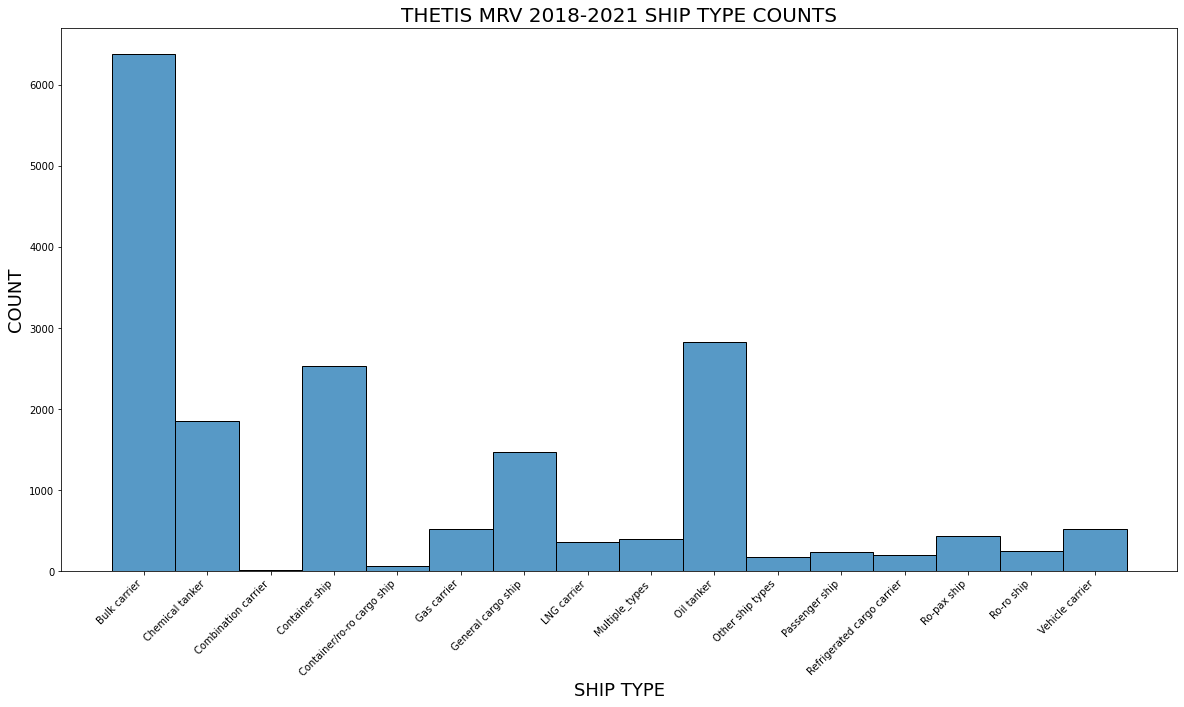

In [410]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45, ha = "right")
plt.title("THETIS MRV 2018-2021 SHIP TYPE COUNTS", fontsize=20)
plt.xlabel("SHIP TYPE", fontsize=18)
plt.ylabel("COUNT", fontsize=18)
sns.histplot(data=IMO_Type_df_byIMO.sort_values("Ship_type"), x="Ship_type")

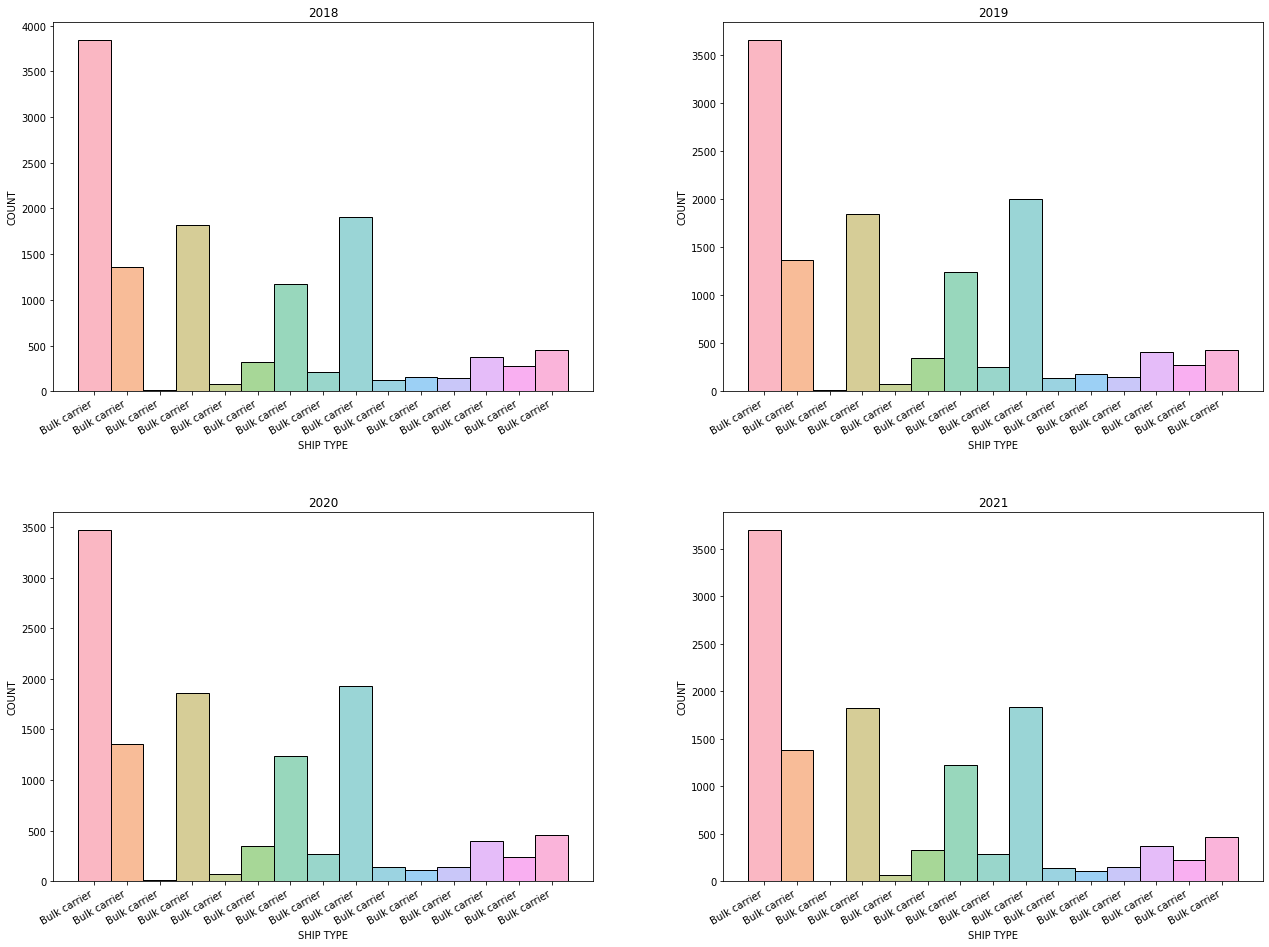

In [414]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.tight_layout(pad=10)

dfs =  [[mrv_2018_df,mrv_2019_df],[mrv_2020_df, mrv_2021_df]]
colours =  [["blue","orange"],["green", "red"]]
for i in range(2):
    for j in range(2):
        ax = axs[i,j]
        df = dfs[i][j]
        col = colours[i][j]
        ax.set_title(df.name.replace("mrv_", ""))
        ax.set_xticklabels(labels = df.sort_values("Ship_type").Ship_type, rotation=30, ha="right")
        ax.set_xlabel("SHIP TYPE")
        ax.set_ylabel("COUNT")
        sns.histplot(data=df.sort_values("Ship_type"), x="Ship_type", ax=ax, color=col, hue="Ship_type")
        ax.legend([],[], frameon=False)


In [415]:
# Calculating type counts 
mrv_2018_Ship_type_counts = mrv_2018_df.groupby("Ship_type")["Ship_type"].count()
mrv_2019_Ship_type_counts = mrv_2019_df.groupby("Ship_type")["Ship_type"].count()
mrv_2020_Ship_type_counts = mrv_2020_df.groupby("Ship_type")["Ship_type"].count()
mrv_2021_Ship_type_counts = mrv_2021_df.groupby("Ship_type")["Ship_type"].count()

In [ ]:
def percentage_change(series_a, series_b):
# Calculates the % difference between series
    return (series_b - series_a)/series_b*100

In [ ]:
# Calculating year on year % changes in types
Ship_type_change_18_19 = percentage_change(mrv_2018_Ship_type_counts,mrv_2019_Ship_type_counts)
Ship_type_change_19_20 = percentage_change(mrv_2019_Ship_type_counts,mrv_2020_Ship_type_counts)
Ship_type_change_20_21 = percentage_change(mrv_2020_Ship_type_counts,mrv_2021_Ship_type_counts)

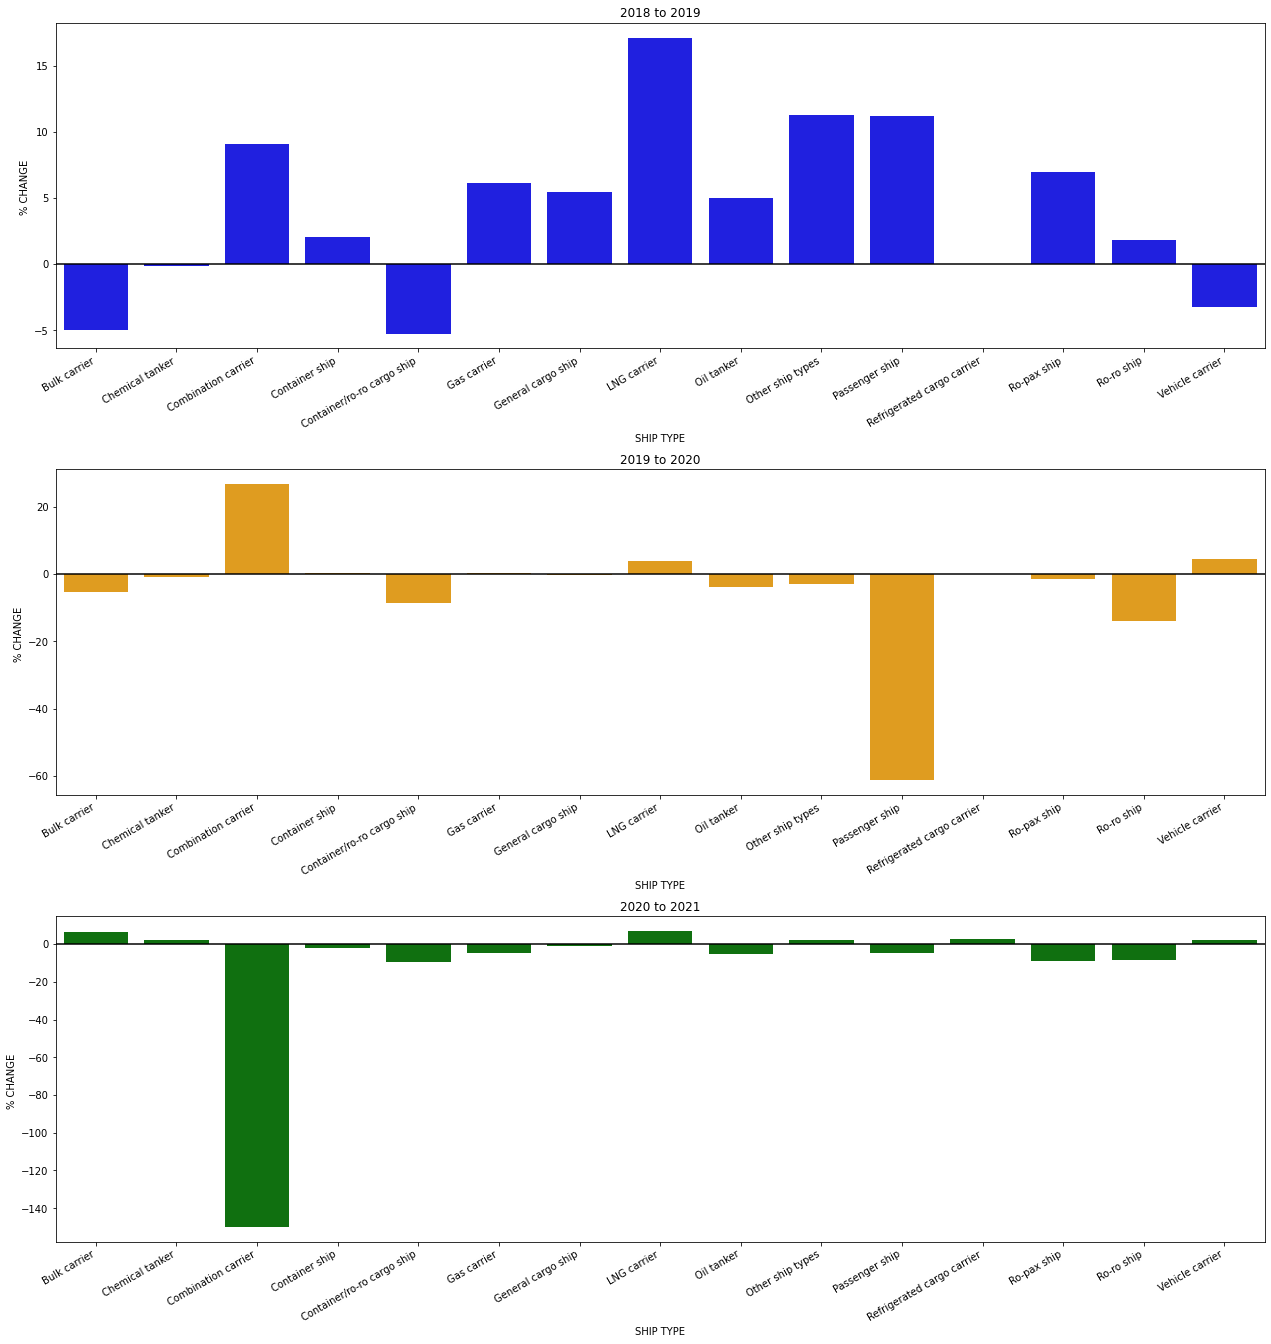

In [417]:
# Plotting year on year % changes in types
fig, axs = plt.subplots(3, 1, figsize=(20, 20))
fig.tight_layout(pad=10)

series =  [Ship_type_change_18_19, Ship_type_change_19_20, Ship_type_change_20_21]
colours =  ["blue","orange","green"]
titles = ["2018 to 2019", "2019 to 2020", "2020 to 2021"]

for j in range(3):

    ax = axs[j]
    s = series[j]
    col = colours[j]
    ax.set_title(titles[j])
    ax.axhline(y=0, color='k')
    ax.set_xticklabels(labels = s.index, rotation=30, ha="right")
    ax.set_ylabel("% CHANGE ")
    sns.barplot(x = s.index, y = s.values,  ax=ax, color=col)
    ax.set_xlabel("SHIP TYPE")


## EMISSION PROFILES

In [ ]:
IMO_Type_df = mrv_df[["IMO_Number","Ship_type"]].copy().drop_duplicates()
IMO_Type_df 

In [ ]:
mrv_efficiency_df = mrv_df[["IMO_Number","Ship_type","Technical_efficiency", "Annual_average_CO₂_emissions_per_transport_work_(mass)_[g_CO₂_/_m_tonnes_·_n_miles]"]].copy()
mrv_efficiency_df.columns = ["IMO_Number", "Ship_type", "Technical_efficiency", "Measured_efficiency"]
mrv_efficiency_df

,IMO_Number,Ship_type,Technical_efficiency,Measured_efficiency
0,6703343,Other ship types,EIV (57.84 gCO₂/t·nm),210.74
1,7037806,Ro-pax ship,EIV (19.4 gCO₂/t·nm),NaN
2,7043843,Ro-ro ship,EIV (48.71 gCO₂/t·nm),695.22
3,7128332,Ro-pax ship,EIV (9.29 gCO₂/t·nm),NaN
4,7226952,Ro-ro ship,EIV (43 gCO₂/t·nm),250.63
...,...,...,...,...
48793,9838199,Chemical tanker,EEDI (12.93 gCO₂/t·nm),56.31
48794,9839064,Bulk carrier,NaN,Division by zero!
48795,9840790,Bulk carrier,NaN,Division by zero!
48796,9847140,Chemical tanker,EIV (9.16 gCO₂/t·nm),13.33


In [ ]:
def handle_te_type(te):
    try:
        te_type = re.findall(r"(EIV|EEDI)",te)[0]
        return te_type
    except: 
        return np.nan

def handle_te_val(te):
    try:
        te_value = float(re.findall(r"(\(\d.*\s)",te)[0][1:-1])
        if te_value == 0:
            return np.nan
        return te_value
    except: 
        return np.nan
def handle_emispt(emis):
    if type(emis) == float:
        return emis
    else:
        return np.nan

In [ ]:
mrv_efficiency_df.Technical_efficiency.isna().sum()

4120

In [ ]:
mrv_efficiency_df["Technical_efficiency_measure"] = mrv_efficiency_df.Technical_efficiency.apply(handle_te_type)
mrv_efficiency_df.Technical_efficiency = mrv_efficiency_df.Technical_efficiency.apply(handle_te_val)
mrv_efficiency_df.Measured_efficiency = mrv_efficiency_df.Measured_efficiency.apply(handle_emispt)
mrv_efficiency_df

,IMO_Number,Ship_type,Technical_efficiency,Measured_efficiency,Technical_efficiency_measure
0,6703343,Other ship types,57.84,210.74,EIV
1,7037806,Ro-pax ship,19.40,NaN,EIV
2,7043843,Ro-ro ship,48.71,695.22,EIV
3,7128332,Ro-pax ship,9.29,NaN,EIV
4,7226952,Ro-ro ship,43.00,250.63,EIV
...,...,...,...,...,...
48793,9838199,Chemical tanker,12.93,56.31,EEDI
48794,9839064,Bulk carrier,NaN,NaN,NaN
48795,9840790,Bulk carrier,NaN,NaN,NaN
48796,9847140,Chemical tanker,9.16,13.33,EIV


In [ ]:
(mrv_efficiency_df.Technical_efficiency > 150).sum()

58

Text(0.5, 0, 'TE (gCO2 per t.nm)')

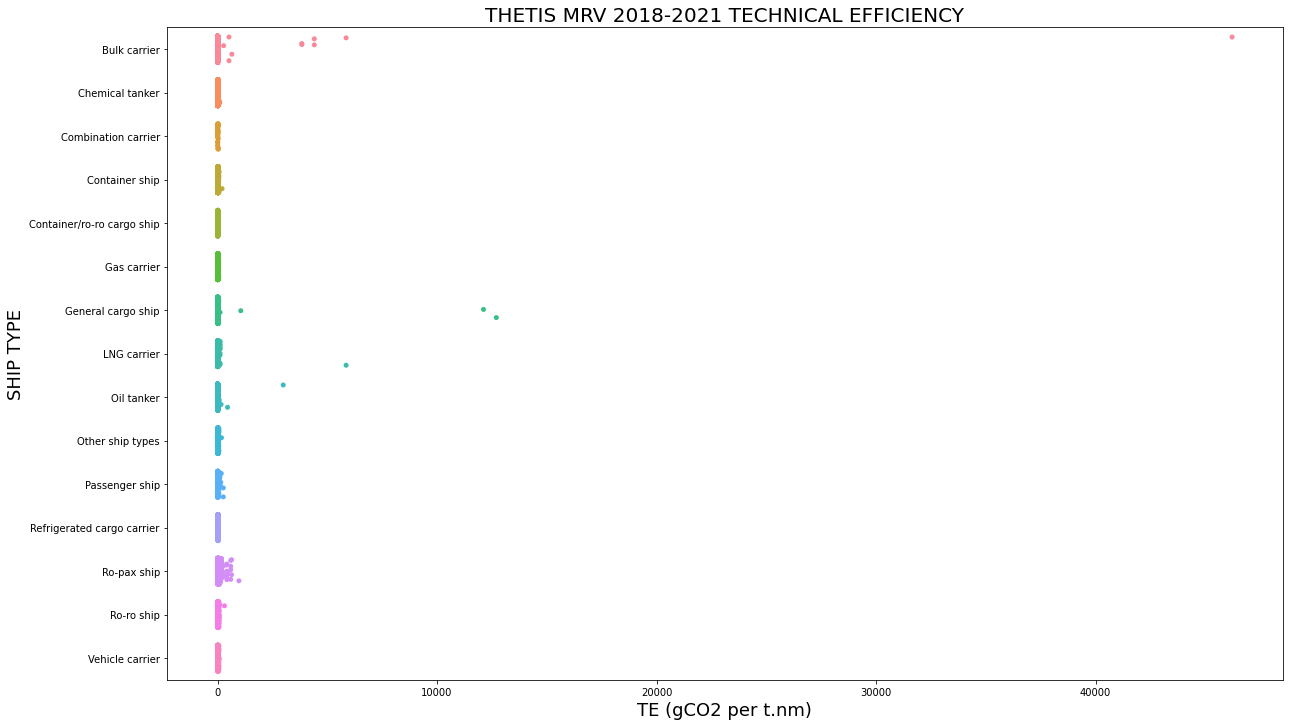

In [ ]:
plt.figure(figsize=(20,12))
plt.title("THETIS MRV 2018-2021 TECHNICAL EFFICIENCY", fontsize=20)
sns.stripplot(data = mrv_efficiency_df.sort_values("Ship_type"), x="Technical_efficiency", y="Ship_type", jitter=0.3)
plt.ylabel("SHIP TYPE", fontsize=18)
plt.xlabel("TE (gCO2 per t.nm)", fontsize=18)

In [ ]:
mrv_efficiency_sub200_df = mrv_efficiency_df[mrv_efficiency_df.Technical_efficiency < 200]
mrv_efficiency_sub50_df = mrv_efficiency_df[mrv_efficiency_df.Technical_efficiency < 50]

Text(0.5, 0, 'TE (gCO2 per t.nm)')

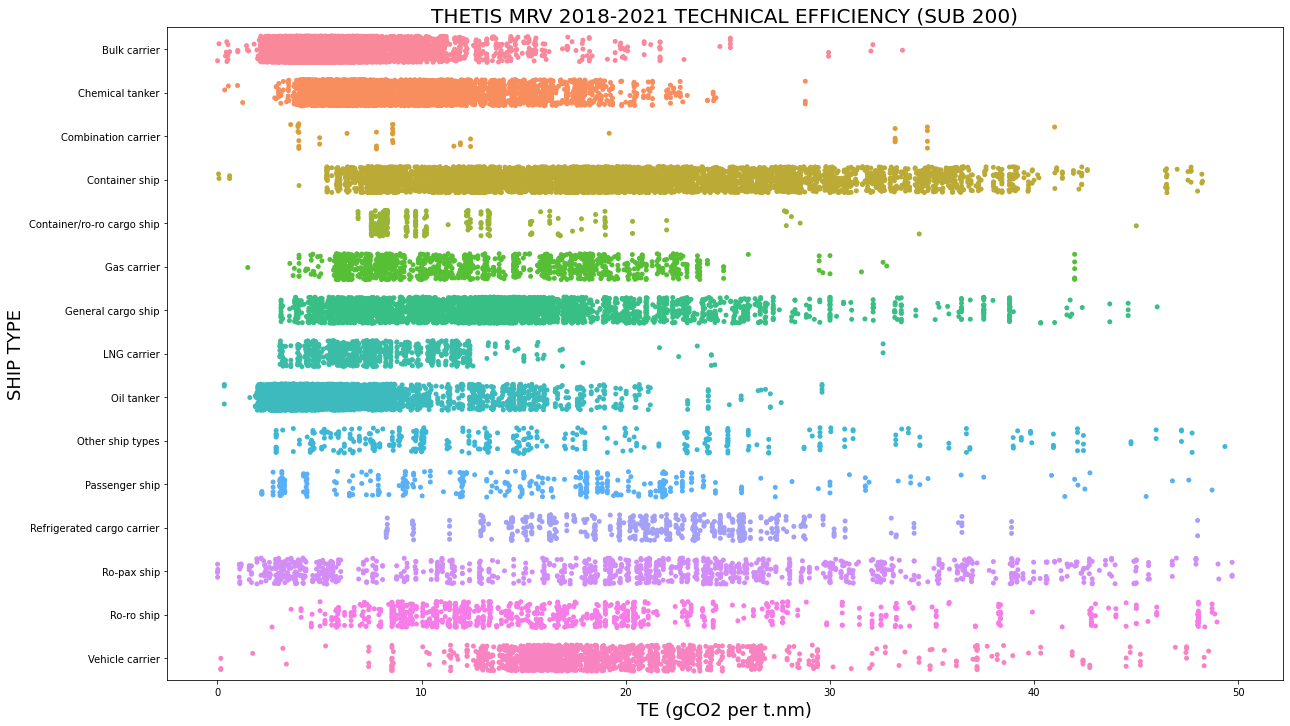

In [ ]:
plt.figure(figsize=(20,12))
plt.title("THETIS MRV 2018-2021 TECHNICAL EFFICIENCY (SUB 200)", fontsize=20)
#plt.xticks(rotation=45, ha = "right")
sns.stripplot(data = mrv_efficiency_sub50_df.sort_values("Ship_type"), x="Technical_efficiency", y="Ship_type", jitter=0.3)
plt.ylabel("SHIP TYPE", fontsize=18)
plt.xlabel("TE (gCO2 per t.nm)", fontsize=18)

Text(0.5, 0, 'TE (gCO2 per t.nm)')

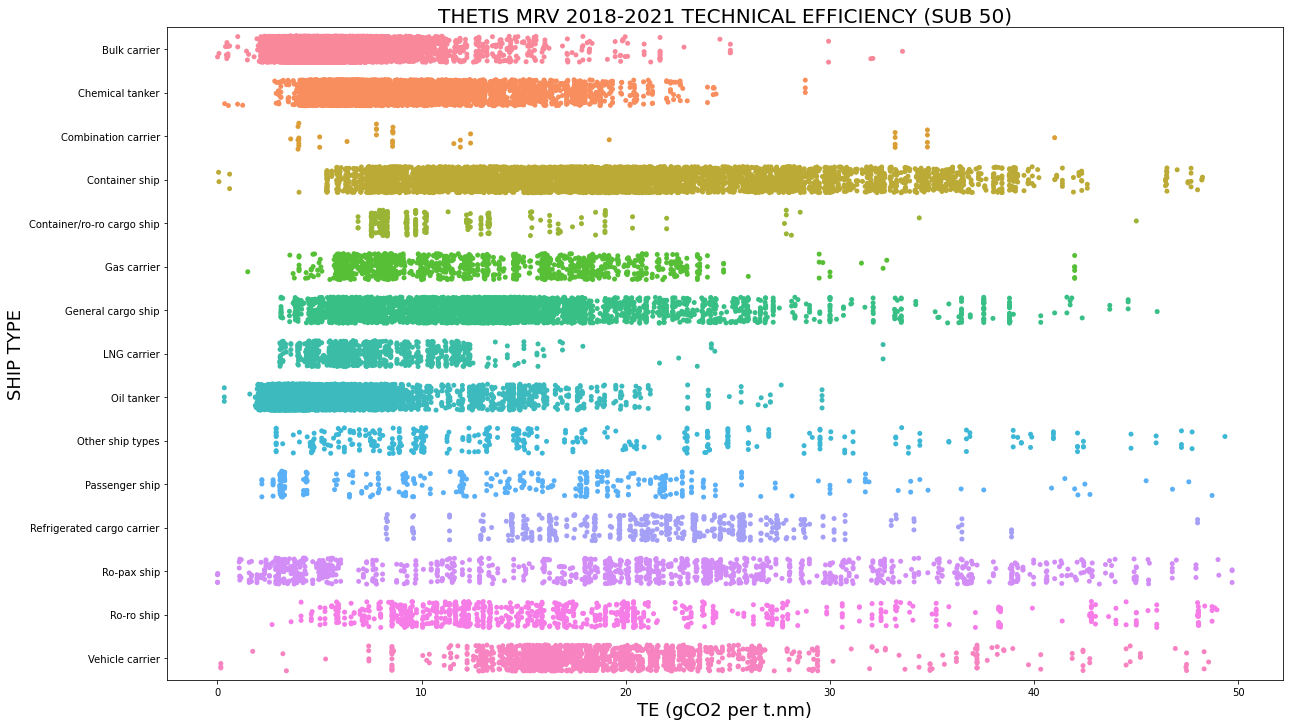

In [ ]:
plt.figure(figsize=(20,12))
plt.title("THETIS MRV 2018-2021 TECHNICAL EFFICIENCY (SUB 50)", fontsize=20)
sns.stripplot(data = mrv_efficiency_sub50_df.sort_values("Ship_type"), x="Technical_efficiency", y="Ship_type", jitter=0.3)
plt.ylabel("SHIP TYPE", fontsize=18)
plt.xlabel("TE (gCO2 per t.nm)", fontsize=18)

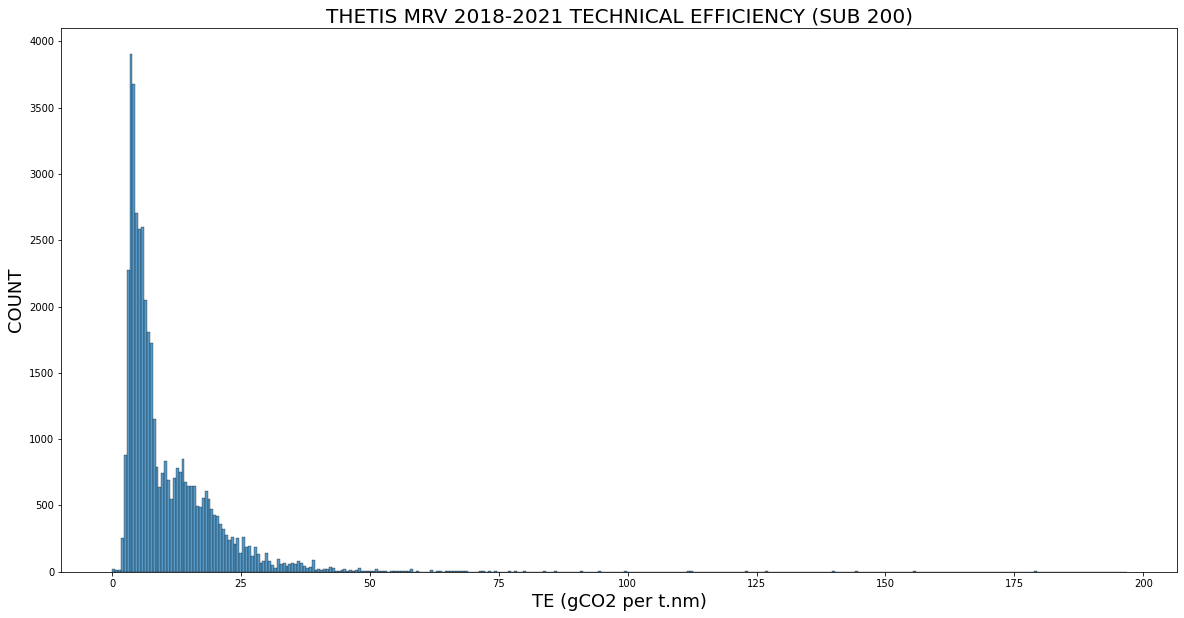

In [ ]:
plt.figure(figsize=(20,10))
plt.title("THETIS MRV 2018-2021 TECHNICAL EFFICIENCY (SUB 200)", fontsize=20)
plt.xlabel("TE (gCO2 per t.nm)", fontsize=18)
plt.ylabel("COUNT", fontsize=18)
sns.histplot(data = mrv_efficiency_sub200_df, x = "Technical_efficiency")

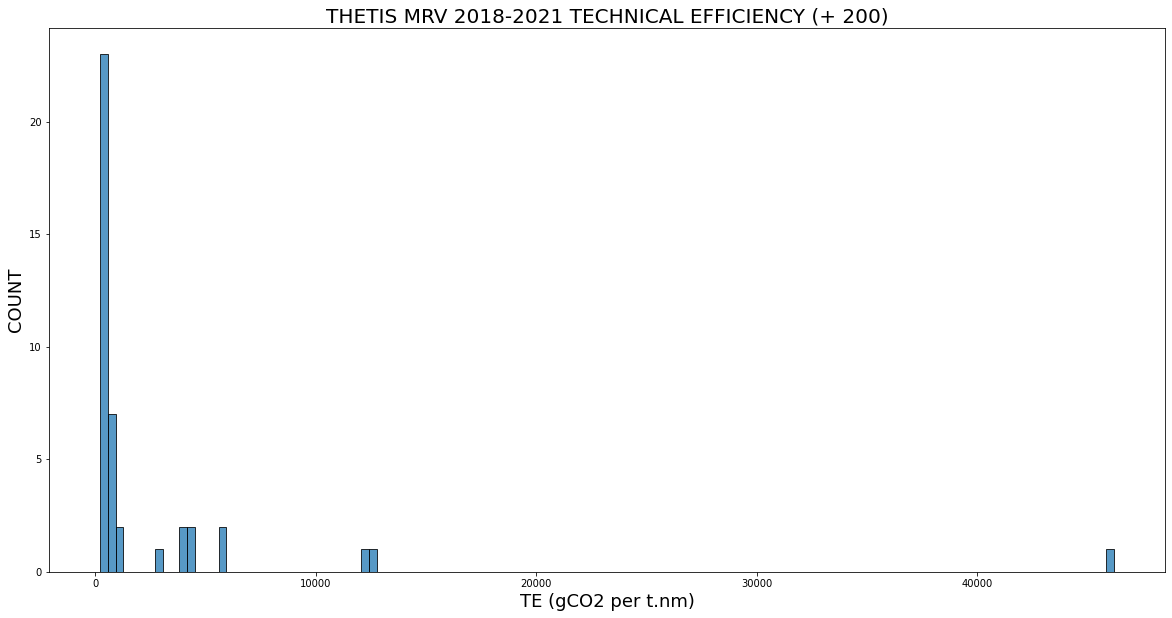

In [ ]:
plt.figure(figsize=(20,10))
plt.title("THETIS MRV 2018-2021 TECHNICAL EFFICIENCY (+ 200)", fontsize=20)
plt.xlabel("TE (gCO2 per t.nm)", fontsize=18)
plt.ylabel("COUNT", fontsize=18)
sns.histplot(data = mrv_efficiency_df[mrv_efficiency_df.Technical_efficiency > 200], x = "Technical_efficiency")

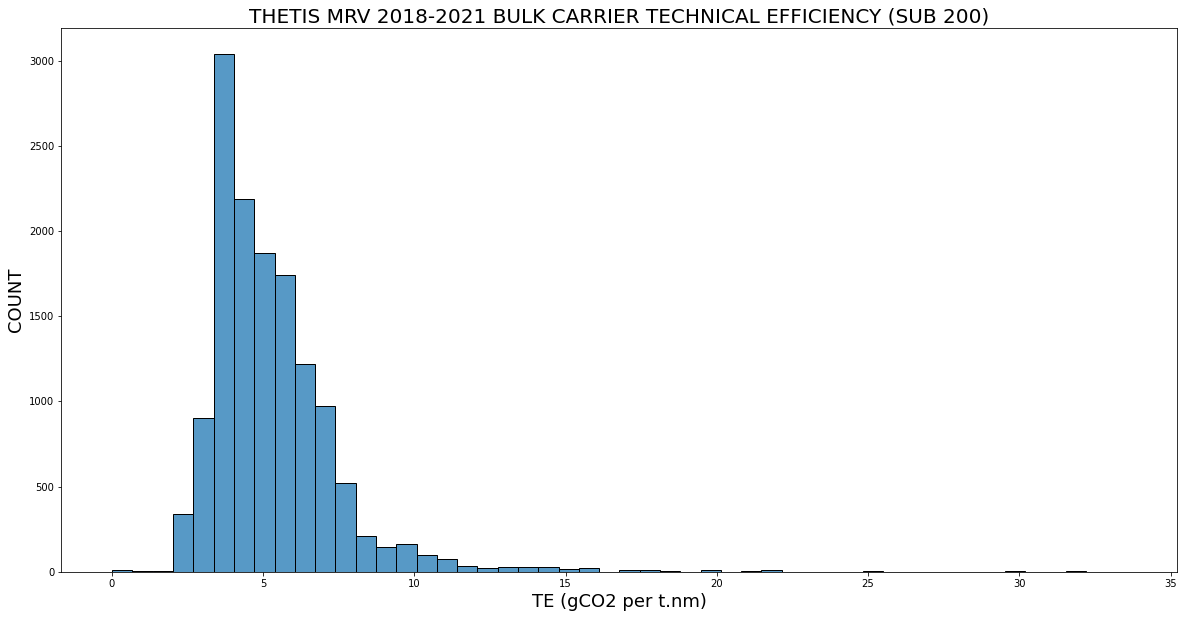

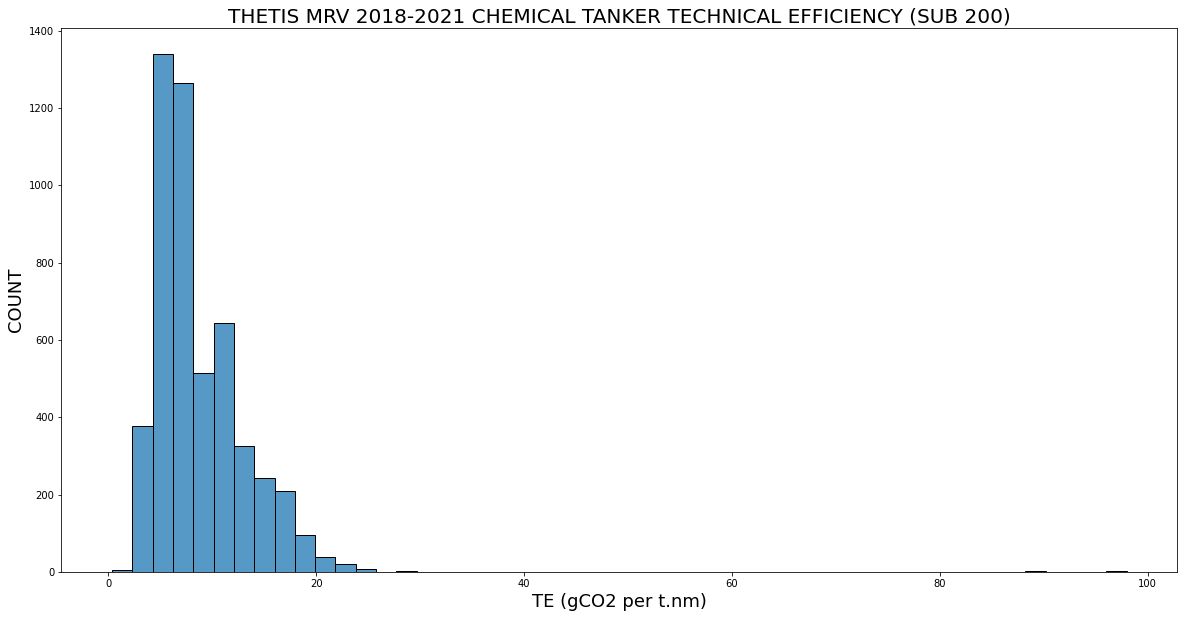

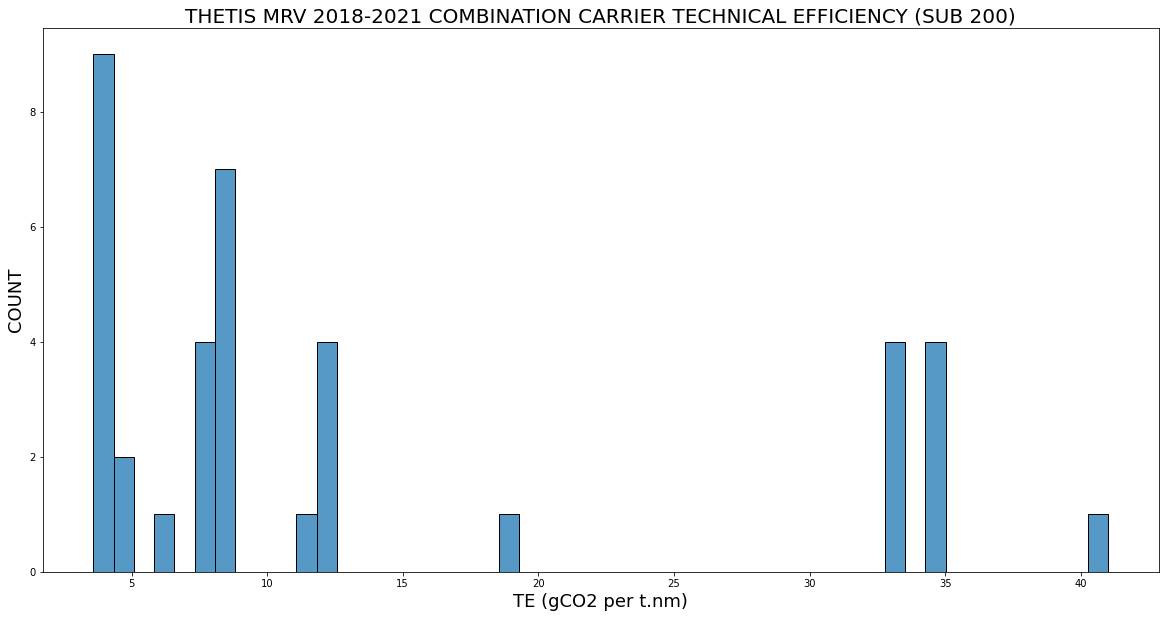

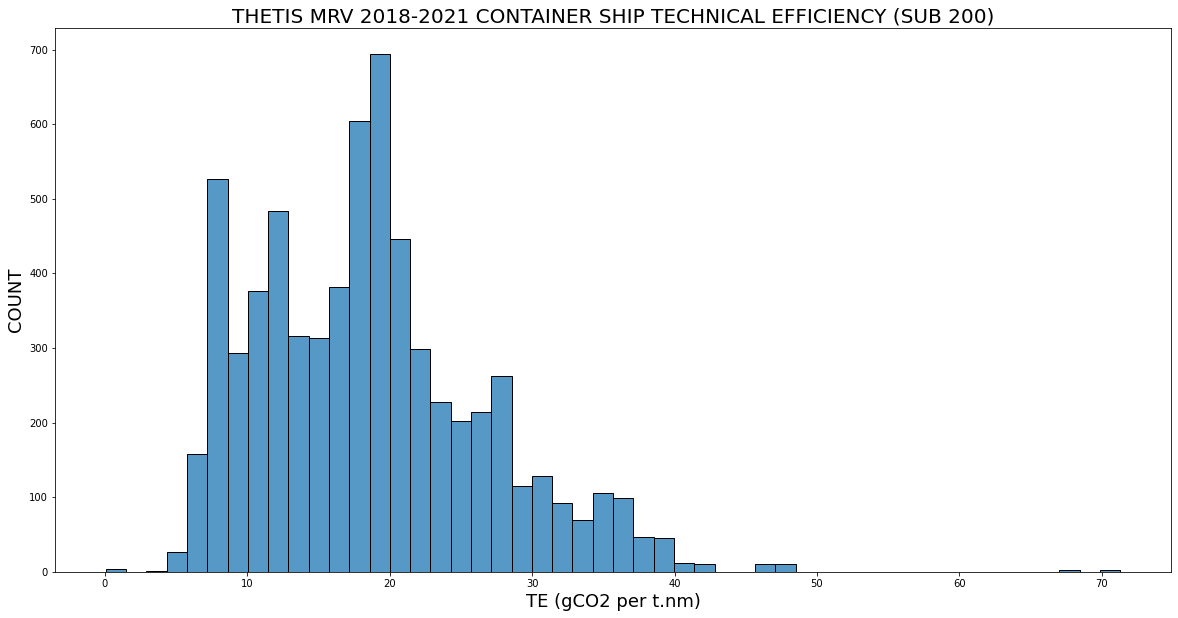

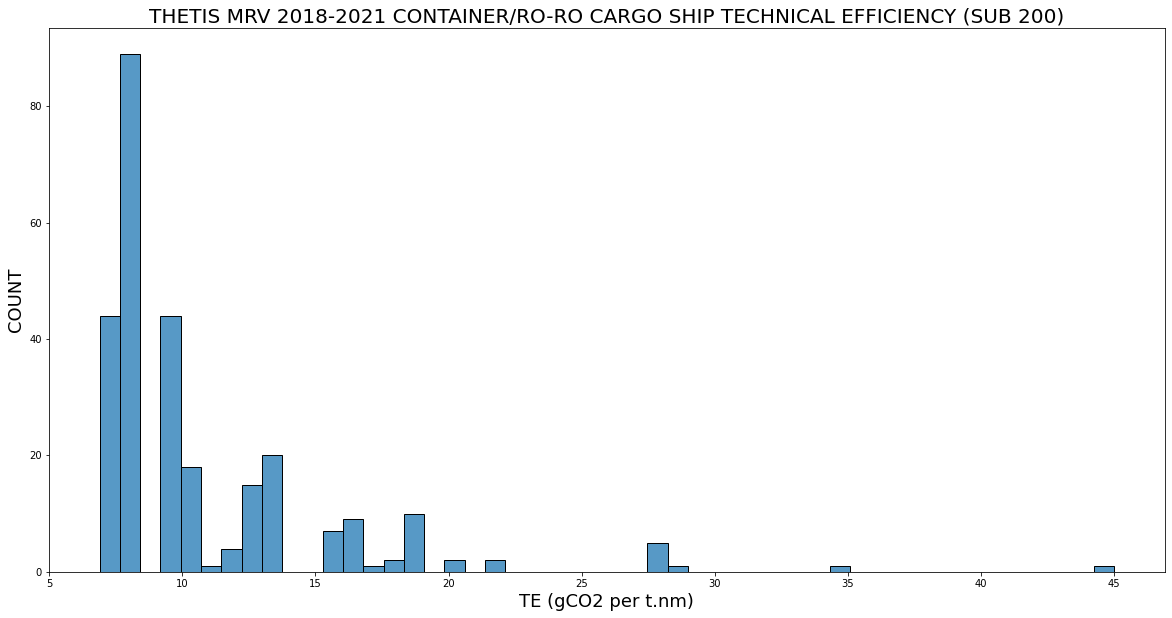

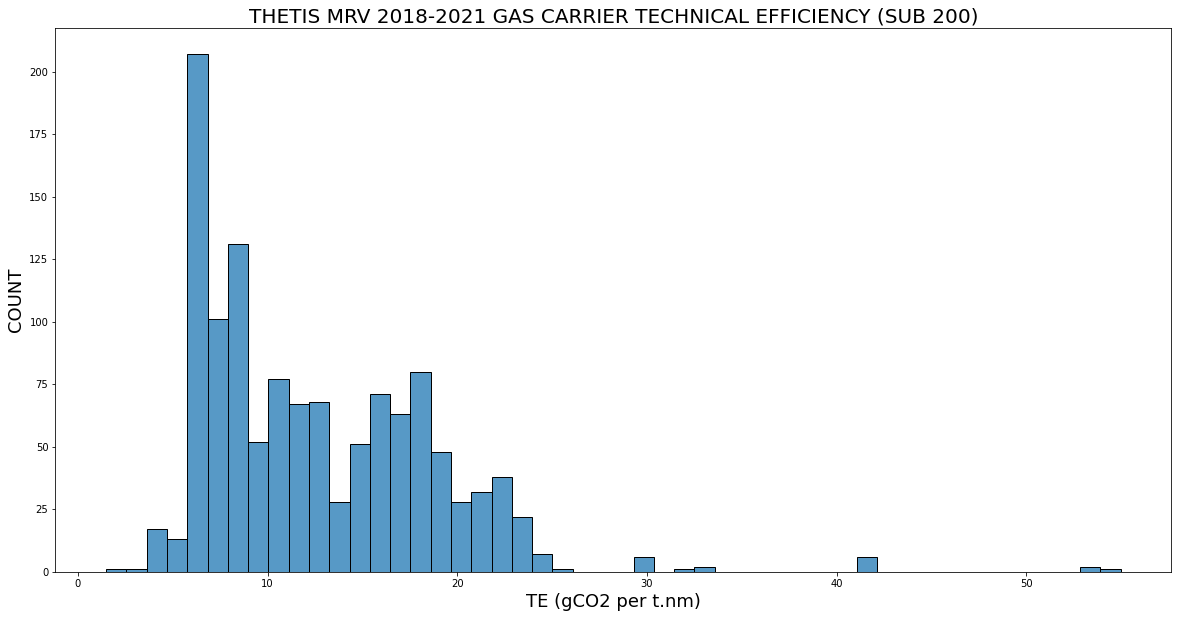

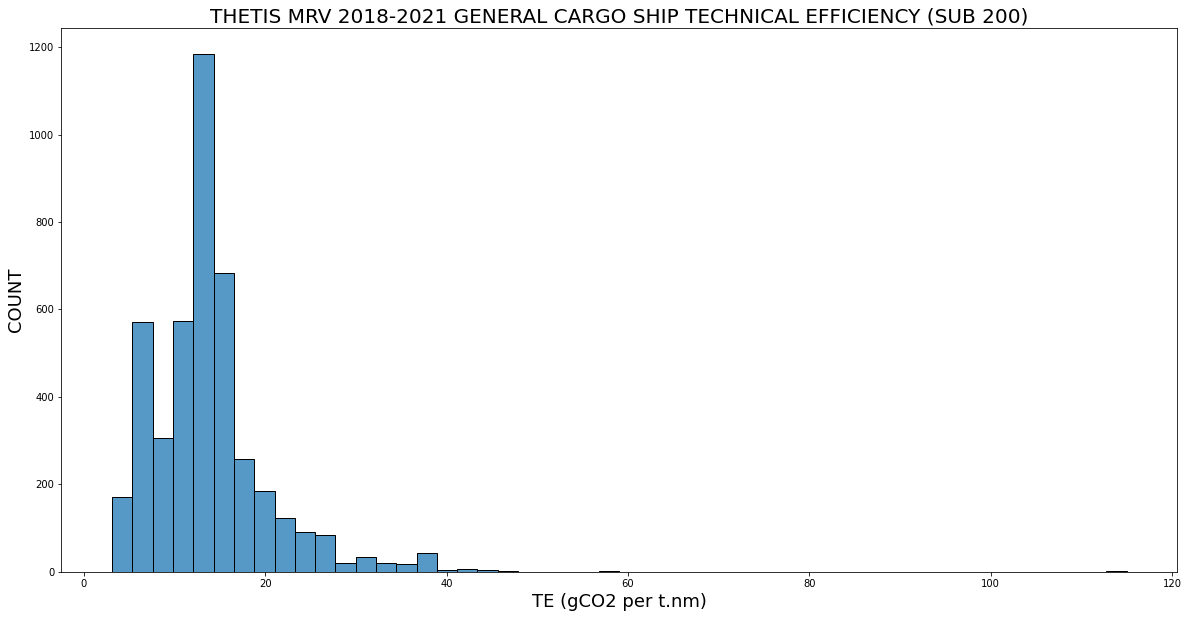

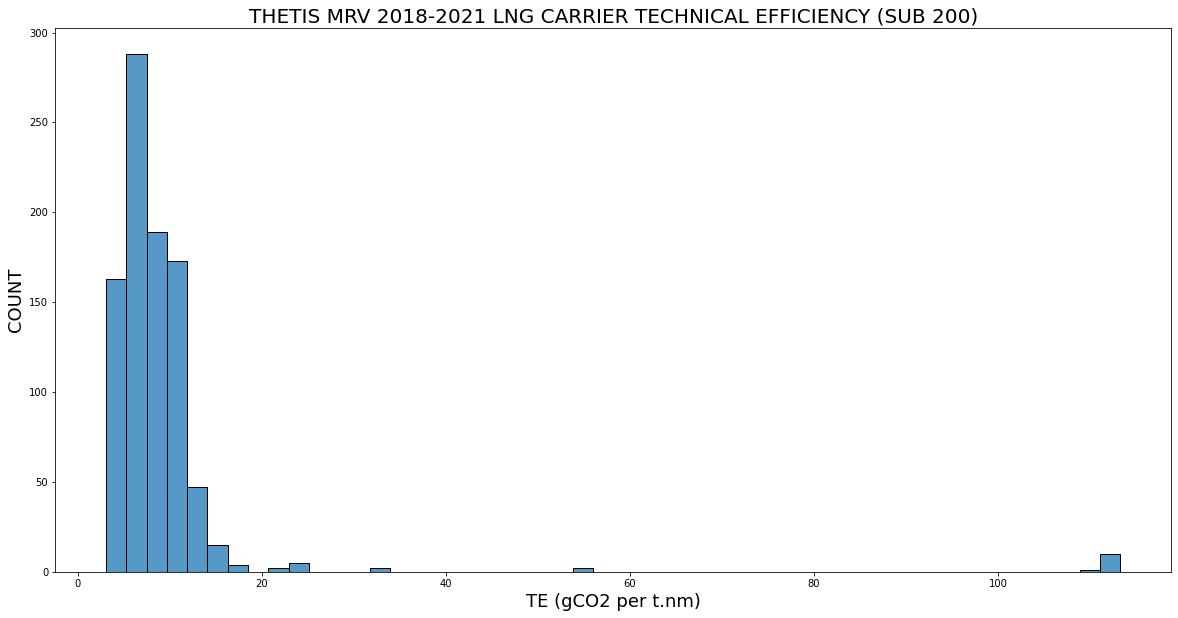

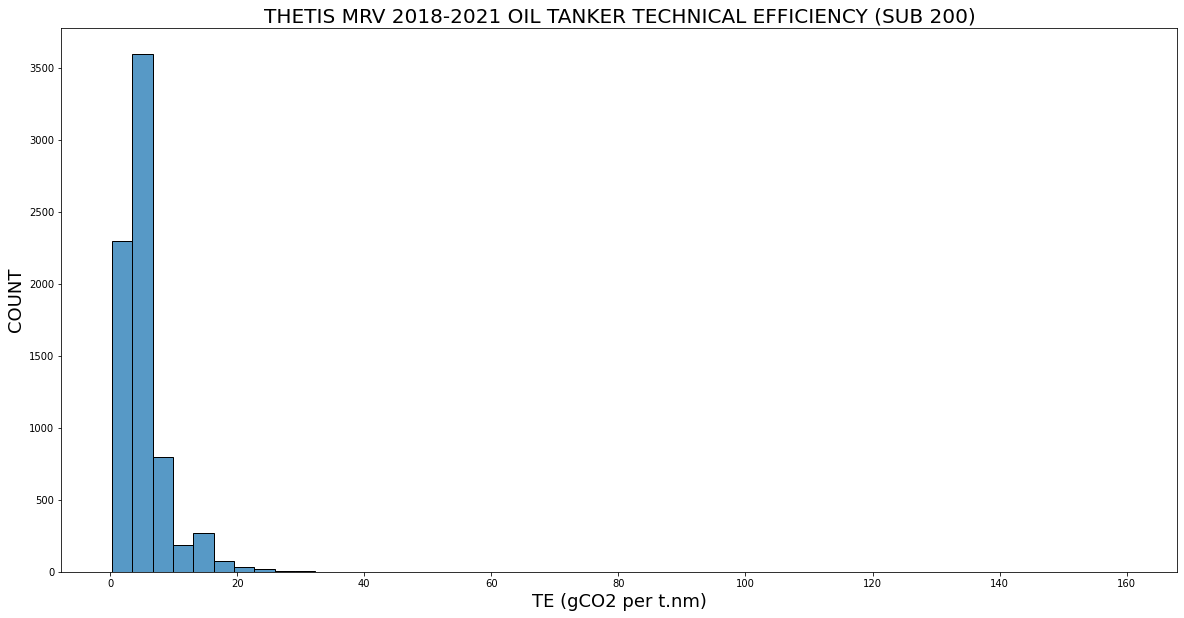

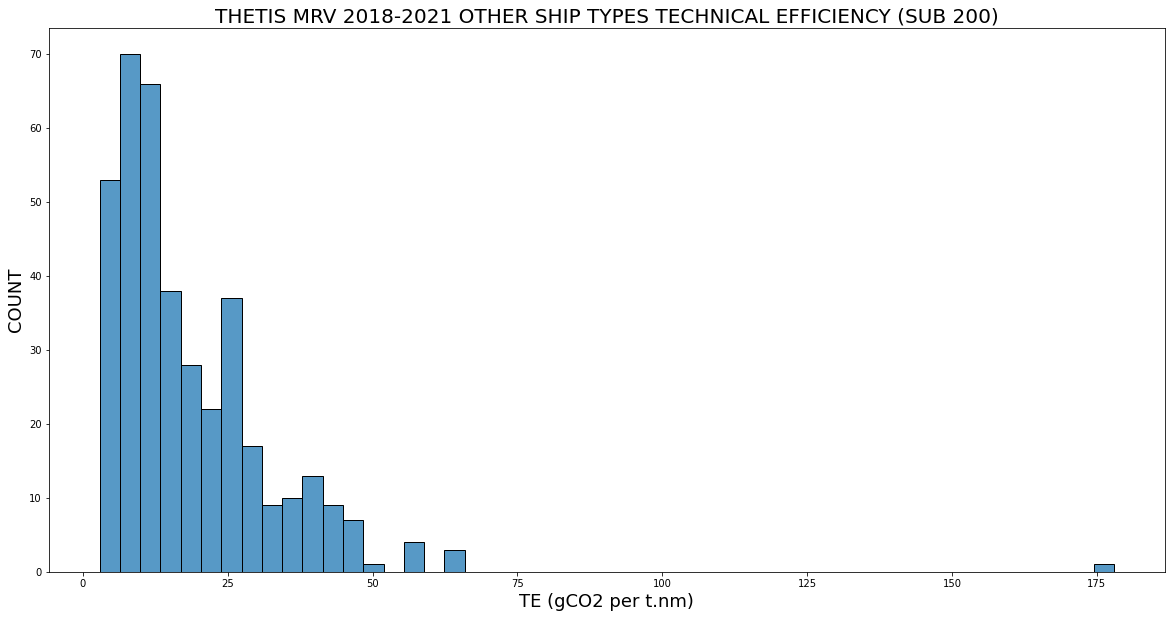

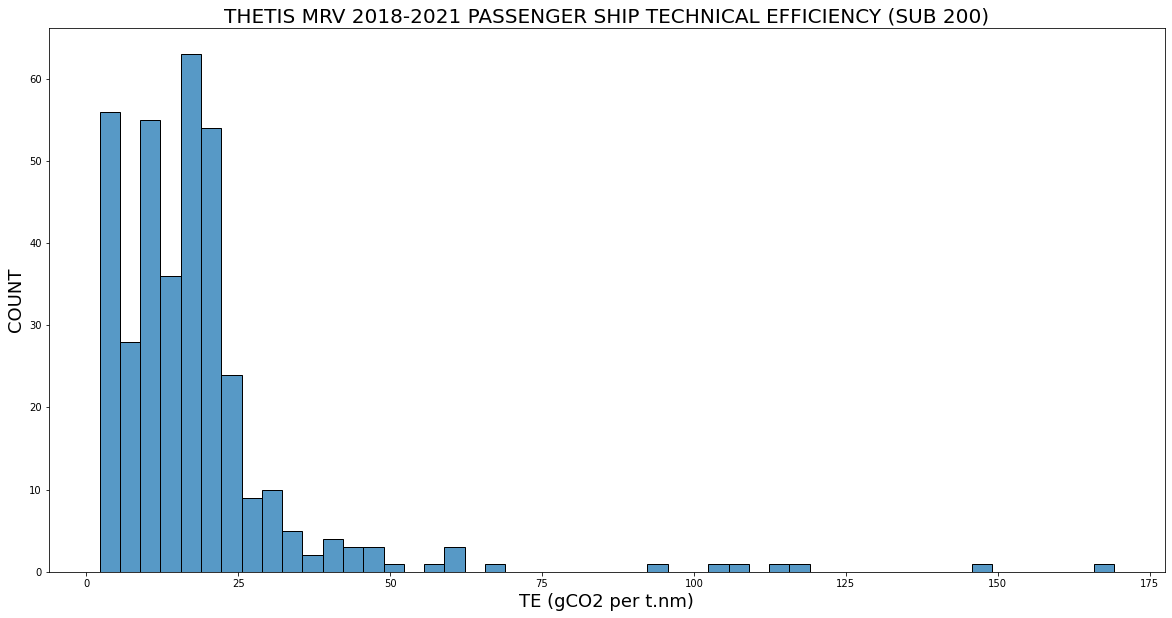

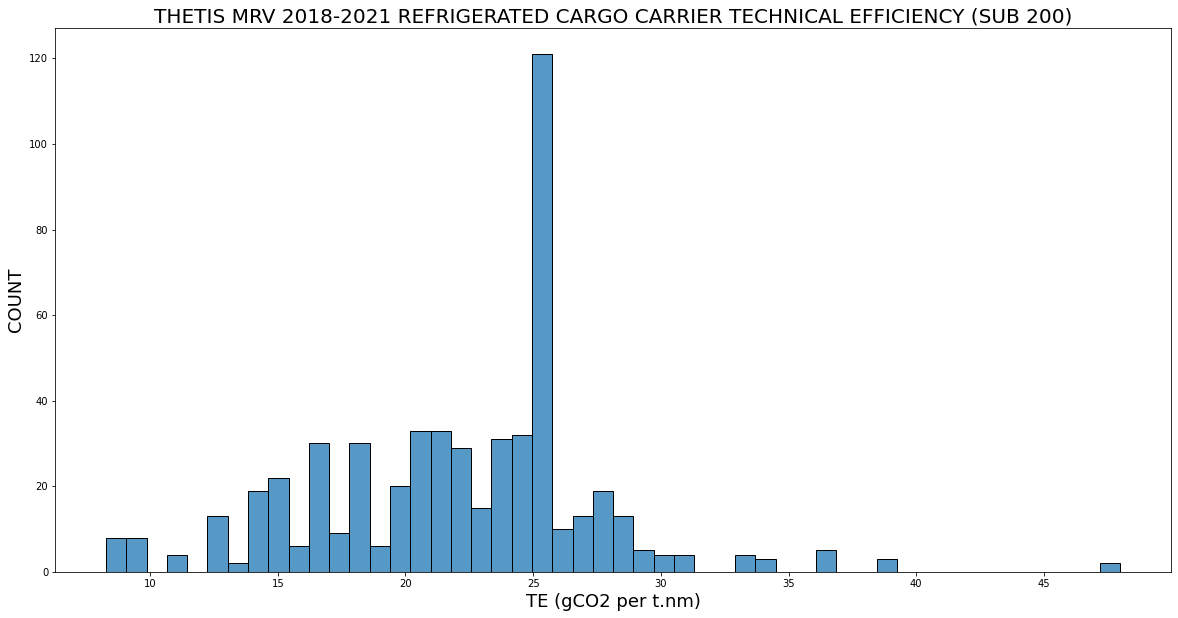

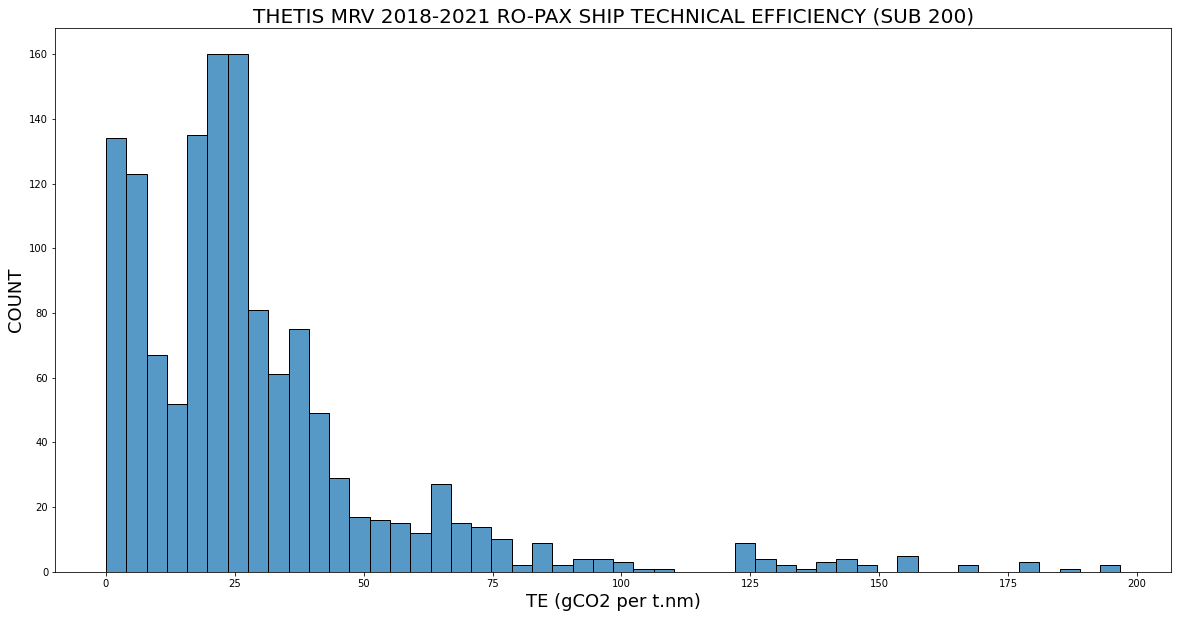

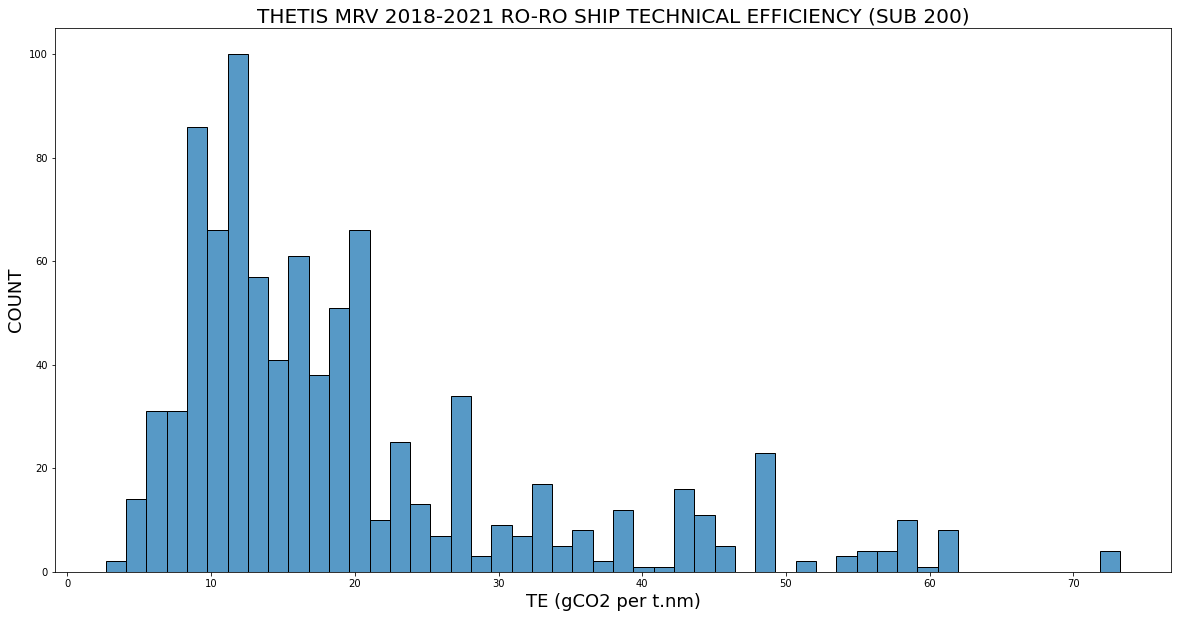

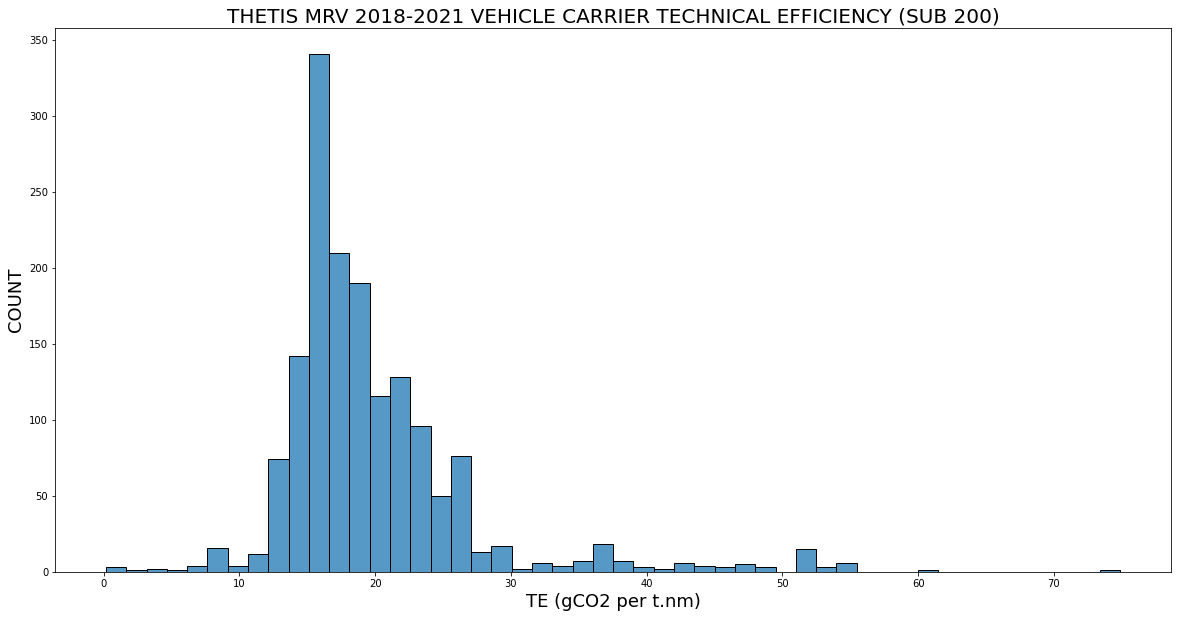

In [ ]:
for stype in sorted(mrv_efficiency_sub200_df.Ship_type.unique()):

    plt.figure(figsize=(20,10))
    plt.title(f"THETIS MRV 2018-2021 {stype.upper()} TECHNICAL EFFICIENCY (SUB 200)", fontsize=20)
    plt.xlabel("TE (gCO2 per t.nm)", fontsize=18)
    plt.ylabel("COUNT", fontsize=18)
    sns.histplot(data = mrv_efficiency_sub200_df[mrv_efficiency_sub200_df.Ship_type == stype],
                 x = "Technical_efficiency", bins = 50)

Text(0.5, 0, 'TE (gCO2 per t.nm)')

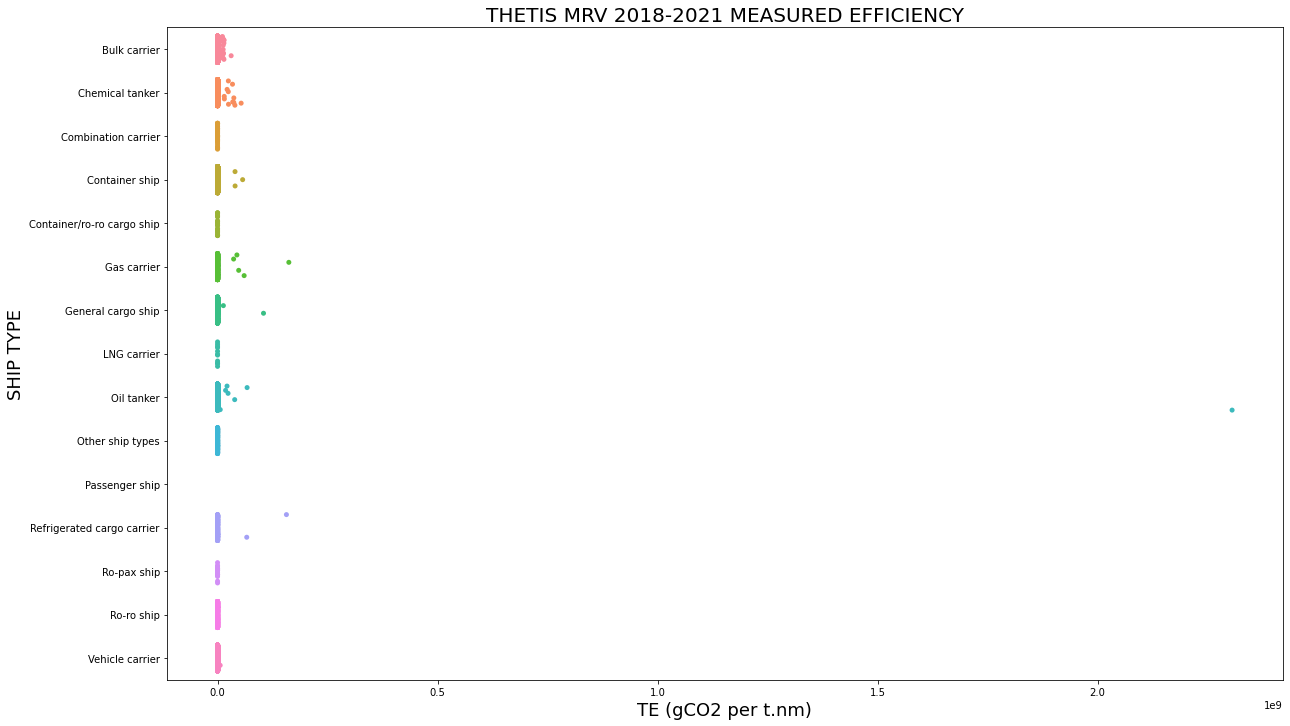

In [ ]:
plt.figure(figsize=(20,12))
plt.title("THETIS MRV 2018-2021 MEASURED EFFICIENCY", fontsize=20)
sns.stripplot(data = mrv_efficiency_df.sort_values("Ship_type"), x="Measured_efficiency", y="Ship_type", jitter=0.3)
plt.ylabel("SHIP TYPE", fontsize=18)
plt.xlabel("ME (gCO2 per t.nm)", fontsize=18)

In [ ]:
(mrv_efficiency_df.Measured_efficiency > 200).sum()

39228

In [ ]:
mrv_efficiency_sub200me_df = mrv_efficiency_df[mrv_efficiency_df.Measured_efficiency < 200]
mrv_efficiency_sub50me_df = mrv_efficiency_df[mrv_efficiency_df.Measured_efficiency < 50]

Text(0.5, 0, 'ME (gCO2 per t.nm)')

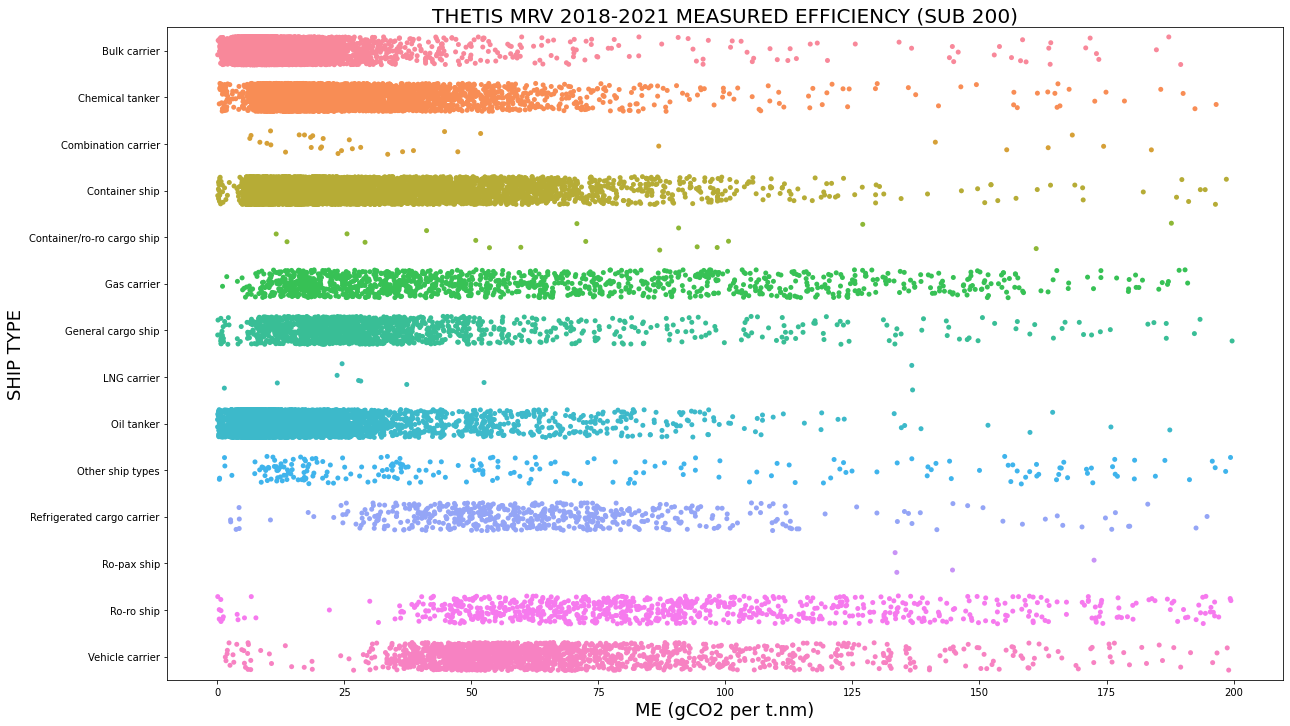

In [ ]:
plt.figure(figsize=(20,12))
plt.title("THETIS MRV 2018-2021 MEASURED EFFICIENCY (SUB 200)", fontsize=20)
sns.stripplot(data = mrv_efficiency_sub200me_df.sort_values("Ship_type"), x="Measured_efficiency", y="Ship_type", jitter=0.3)
plt.ylabel("SHIP TYPE", fontsize=18)
plt.xlabel("ME (gCO2 per t.nm)", fontsize=18)

In [ ]:
mrv_efficiency_me_indexes = mrv_efficiency_df[mrv_efficiency_df.Measured_efficiency < 300].index
mrv_efficiency_indexes = mrv_efficiency_df[mrv_efficiency_df.Technical_efficiency < 50].index
index_intersection = np.intersect1d(mrv_efficiency_me_indexes,mrv_efficiency_indexes)

Text(0.5, 0, 'ME (gCO2 per t.nm)')

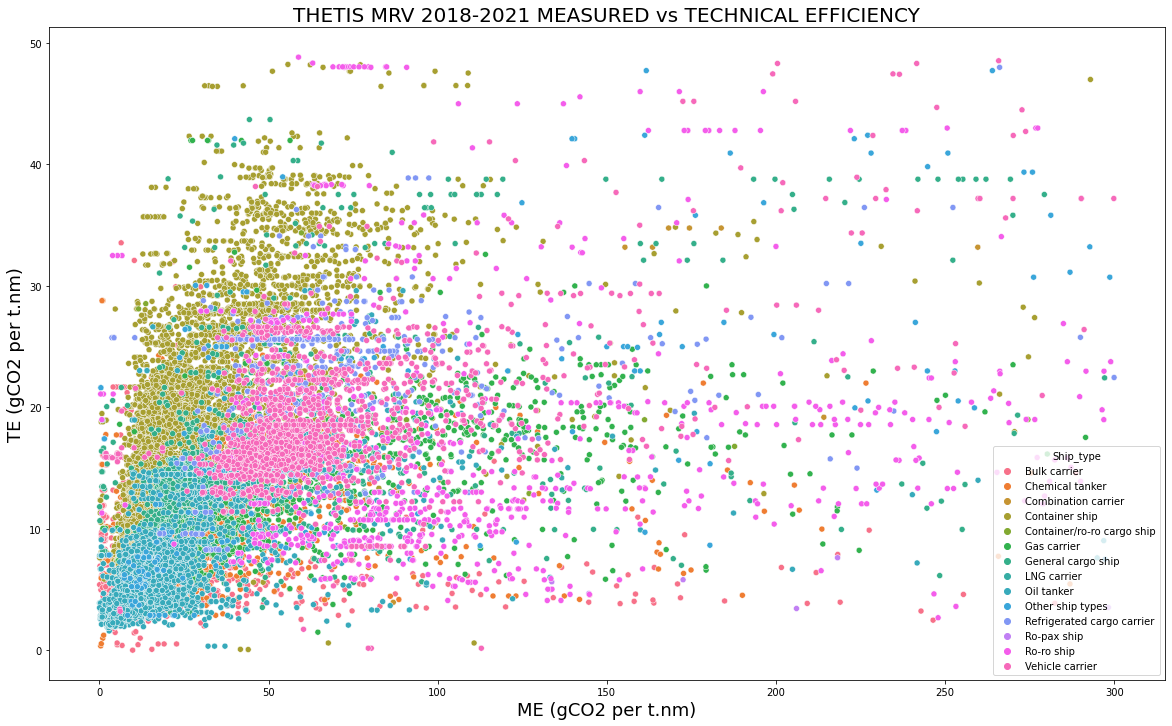

In [ ]:
plt.figure(figsize=(20,12))
plt.title("THETIS MRV 2018-2021 MEASURED vs TECHNICAL EFFICIENCY", fontsize=20)
sns.scatterplot(data = mrv_efficiency_sub200_df.loc[index_intersection].sort_values("Ship_type"),
                 x="Measured_efficiency", y="Technical_efficiency", hue="Ship_type")
plt.ylabel("TE (gCO2 per t.nm)", fontsize=18)
plt.xlabel("ME (gCO2 per t.nm)", fontsize=18)